In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
#%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Week 11***

In [ ]:
img = cv.imread('/content/drive/My Drive/Colab Notebooks/material/ducky.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (93,18,338,220)

In [ ]:
cv.grabCut(img,mask,rect,bgdModel,fgdModel,2,cv.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[3.93209514e-01, 1.15316925e-01, 8.60243727e-02, 2.04781206e-01,
         2.00667982e-01, 1.37172745e+02, 1.48828612e+02, 8.81121001e+01,
         8.27776043e+01, 7.05753266e+01, 5.44142675e+01, 1.60707610e+02,
         1.71916073e+02, 1.51074628e+02, 1.26336741e+02, 1.25240608e+02,
         8.34466437e+01, 1.43246570e+02, 1.56012624e+02, 1.15958141e+02,
         2.61812201e+01, 2.53604645e+01, 6.15156591e+00, 2.53604645e+01,
         4.67765362e+01, 2.93108556e+00, 6.15156591e+00, 2.93108556e+00,
         3.03636776e+01, 6.17371225e+02, 5.11578291e+02, 5.13659827e+02,
         5.11578291e+02, 4.85870179e+02, 4.95029958e+02, 5.13659827e+02,
         4.95029958e+02, 5.34461982e+02, 6.93529589e+02, 5.75162767e+02,
         6.71468504e+02, 5.75162767e+02, 6.1

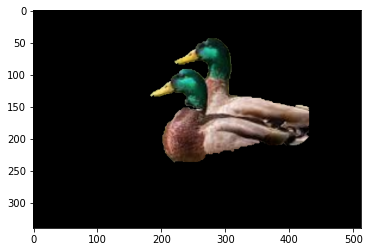

In [ ]:
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)
plt.show()

Activity 4.5

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/drive/My Drive/Colab Notebooks/material/ducky.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [ ]:
scale_percent = 0.5
width = int(img.shape[1] * scale_percent)
height = int(img.shape[0] * scale_percent)
dim = (width, height)
img = cv.resize(img, dim, interpolation = cv.INTER_CUBIC)
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (47,9,81,60)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,2,cv.GC_INIT_WITH_RECT)

error: ignored

In [ ]:
mask2 = np.where((mask==2) | (mask==0), 0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
bg = cv.imread('/content/drive/My Drive/Colab Notebooks/material/Forest.png')
rows = bg.shape[0]
cols = bg.shape[1]
#Put at the location
for r in range(rect[3]):
    for c in range(rect[2]):
      if mask2[rect[1]+r, rect[0]+c] == 1:
        bg[r+620,c+580] = img[rect[1]+r, rect[0]+c]
plt.imshow(bg)
plt.show()

IndexError: ignored

# ***Week 12***

# Face Recognitio

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# Create a data generator
from keras.preprocessing.image import ImageDataGenerator
img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 3)
num_classes=20
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/material/GeorgiaTech/gt_db_train/',target_size=(img_rows,img_cols),batch_size=10,class_mode='categorical', shuffle=True)
step_size_train=train_generator.n/train_generator.batch_size

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/material/GeorgiaTech/gt_db_val/',target_size=(img_rows,img_cols),batch_size=10,class_mode='categorical',shuffle=True)
step_size_val=val_generator.n/val_generator.batch_size

Found 200 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
activation='relu',
input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 128)               18874496  
                                                                 
 dense_1 (Dense)             (None, 20)                2580      
                                                        

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam
adam = Adam(lr=0.0003)
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=adam,
metrics=['accuracy'])
history = model.fit_generator(generator=train_generator,
steps_per_epoch=step_size_train,epochs=10,
validation_data=val_generator,
validation_steps=step_size_val)



Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


20/20 [==============================] - 16s 743ms/step - loss: 3.1849 - accuracy: 0.1450 - val_loss: 2.5969 - val_accuracy: 0.3100
Epoch 2/10
20/20 [==============================] - 14s 681ms/step - loss: 2.1267 - accuracy: 0.3950 - val_loss: 1.7104 - val_accuracy: 0.7000
Epoch 3/10
20/20 [==============================] - 14s 682ms/step - loss: 1.1270 - accuracy: 0.7250 - val_loss: 0.8562 - val_accuracy: 0.8300
Epoch 4/10
20/20 [==============================] - 14s 692ms/step - loss: 0.5802 - accuracy: 0.8600 - val_loss: 0.5406 - val_accuracy: 0.8600
Epoch 5/10
20/20 [==============================] - 14s 694ms/step - loss: 0.2785 - accuracy: 0.9650 - val_loss: 0.3077 - val_accuracy: 0.9500
Epoch 6/10
20/20 [==============================] - 14s 683ms/step - loss: 0.1459 - accuracy: 0.9650 - val_loss: 0.2437 - val_accuracy: 0.9200
Epoch 7/10
20/20 [==============================] - 14s 684ms/step - loss: 0.1215 - accuracy: 0.9700 - val_loss: 0.1282 - val_accuracy: 0.9900
Epoch 8/10

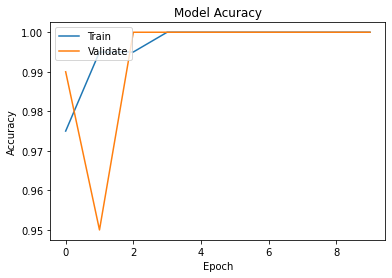

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('Accuracy.png')
plt.show()

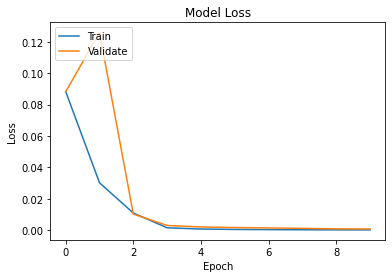

In [ ]:
# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('Loss.png')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
activation='relu',
input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 98, 98, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 dropout_7 (Dropout)         (None, 96, 96, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 147456)            0         
                                                      

# **2.9**

In [ ]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 6.8 MB/s 


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 168ms/step


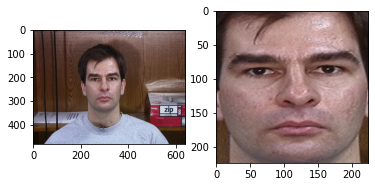

In [ ]:
import cv2
from mtcnn.mtcnn import MTCNN
import os
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import pyplot
file_path = "/content/drive/My Drive/Colab Notebooks/material/GeorgiaTech/gt_db_train/s01/01.jpg"

def extract_face(filename, required_size=(224, 224)):
  # Load an image from file
  image = pyplot.imread(filename)

  # Create the detector, using default settings
  detector = MTCNN()
  # Detect faces in the image
  results = detector.detect_faces(image)
  # Extract the bounding box from the first face
  x1, y1, width, height = results[0]['box']
  x2, y2 = x1 + width, y1 + height
  # Extract the face
  face = image[y1:y2, x1:x2]
  # Crop
  face_image = Image.fromarray(face)
  face_image = face_image.resize(required_size)

  fig=plt.figure()
  fig.add_subplot(1,2,1)
  plt.imshow(image)
  fig.add_subplot(1,2,2)
  plt.imshow(face_image)
  plt.show()

extract_face(file_path, required_size=(224, 224))

In [ ]:
def extractSave_face(filename, outname, required_size=(224, 224)):
  # Load an image from file
  image = pyplot.imread(filename)
  # Create the detector, using default settings
  detector = MTCNN()
  # Detect faces in the image
  results = detector.detect_faces(image)
  # Extract the bounding box from the first face
  x1, y1, width, height = results[0]['box']
  x2, y2 = x1 + width, y1 + height
  # Extract the face
  face = image[y1:y2, x1:x2]
  face_image = Image.fromarray(face)
  face_image = face_image.resize(required_size)
  face_image.save(outname)

In [ ]:
image_paths = os.listdir(f'/content/drive/My Drive/Colab Notebooks/material/GeorgiaTech/gt_db_train/')

dir = f'/content/drive/MyDrive/Colab Notebooks/material/GeorgiaTech/gt_db_train_FaceLocal/'
if not os.path.exists(dir):
  os.mkdir(dir)

# Try first 20 subjects
for path in image_paths:
  # Get all folders (i.e. subjects)
  all_images = os.listdir(f'/content/drive/MyDrive/Colab Notebooks/material/GeorgiaTech/gt_db_train/{path}')
  dirPath = f"/content/drive/MyDrive/Colab Notebooks/material/GeorgiaTech/gt_db_train_FaceLocal/{path}"
  if not os.path.exists(dirPath):
    os.mkdir(dirPath)
  for image in all_images:
    image_path = f"/content/drive/MyDrive/Colab Notebooks/material/GeorgiaTech/gt_db_train/{path}/{image}"
    out_path = f"/content/drive/MyDrive/Colab Notebooks/material/GeorgiaTech/gt_db_train_FaceLocal/{path}/{image}"
    extractSave_face(image_path, out_path, required_size=(224, 224))


1/1 [==============================] - 0s 466ms/step


1/1 [==============================] - 0s 152ms/step
